In [157]:
import janome
import MeCab
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats as st

plt.rcParams["font.family"] = "MS Gothic"

n0 = pd.read_csv("data/n0.csv")
n1 = pd.read_csv("data/n1.csv")
n2 = pd.read_csv("data/n2.csv")
n3 = pd.read_csv("data/n3.csv")
u0 = pd.read_csv("data/u0.csv")
u1 = pd.read_csv("data/u1.csv")
u2 = pd.read_csv("data/u2.csv")
u3 = pd.read_csv("data/u3.csv")
normal_pd = n0.append(n1).append(n2).append(n3)
unnormal_pd = u0.append(u1).append(u2).append(u3)

In [158]:
def hinshiCount(text):
    tagger = MeCab.Tagger("-Ochasen")
    tagger.parse('')
    node = tagger.parseToNode(text)
    hinshiDict = {"名詞":0, "動詞":0, "形容詞":0, "副詞":0, "助詞":0, "接続詞": 0, "助動詞":0, "連体詞":0, "感動詞":0, "*":0 }
    total_hinshi = 0
    while node:
        total_hinshi = total_hinshi + 1
        wclass = node.feature.split(',')
        if wclass[0] != u'BOS/EOS':
            if wclass[0] not in hinshiDict.keys():
                hinshiDict["*"] = hinshiDict["*"] + 1
            else:
                hinshiDict[wclass[0]] = hinshiDict[wclass[0]] + 1
        node = node.next
    for hinshi in hinshiDict:
        if not hinshiDict[hinshi] == 0:
            hinshiDict[hinshi] = hinshiDict[hinshi] / total_hinshi
    return hinshiDict

In [159]:
def hinshipd(pd):
    pd["名詞"] = pd["text"].map(lambda x: hinshiCount(x)["名詞"])
    pd["動詞"] = pd["text"].map(lambda x: hinshiCount(x)["動詞"])
    pd["形容詞"] = pd["text"].map(lambda x: hinshiCount(x)["形容詞"])
    pd["副詞"] = pd["text"].map(lambda x: hinshiCount(x)["副詞"])
    pd["助詞"] = pd["text"].map(lambda x: hinshiCount(x)["助詞"])
    pd["接続詞"] = pd["text"].map(lambda x: hinshiCount(x)["接続詞"])
    pd["助動詞"] = pd["text"].map(lambda x: hinshiCount(x)["助動詞"])
    pd["連体詞"] = pd["text"].map(lambda x: hinshiCount(x)["連体詞"])
    pd["感動詞"] = pd["text"].map(lambda x: hinshiCount(x)["感動詞"])
    pd["他の品詞"] = pd["text"].map(lambda x: hinshiCount(x)["*"])
    return pd


normal_pd = hinshipd(normal_pd)
unnormal_pd = hinshipd(unnormal_pd)

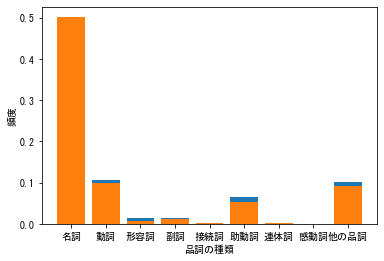

In [160]:
hinshis = ["名詞", "動詞", "形容詞", "副詞", "接続詞", "助動詞", "連体詞", "感動詞", "他の品詞"]
def pltHinshiBar(hinshipd):
    plt.bar(hinshis, [hinshipd[hinshivalue].mean() for hinshivalue in hinshis])
    plt.xlabel("品詞の種類")
    plt.ylabel("頻度")
    return plt

fig1 = pltHinshiBar(normal_pd)
fig1.savefig("images/fig1.png")
fig2 = pltHinshiBar(unnormal_pd)
fig2.savefig("images/fig2.png")

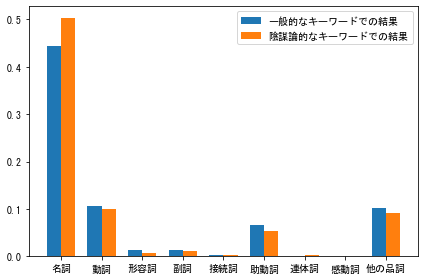

In [161]:
h1 = [normal_pd[hinshivalue].mean() for hinshivalue in hinshis]
h2 = [unnormal_pd[hinshivalue].mean() for hinshivalue in hinshis]

x = np.arange(len(hinshis))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, h1, width, label='一般的なキーワードでの結果')
rects2 = ax.bar(x + width/2, h2, width, label='陰謀論的なキーワードでの結果')

ax.set_xticks(x)
ax.set_xticklabels(hinshis)
ax.legend()


fig.tight_layout()

plt.savefig("images/fig3.png")

<ipython-input-162-d90ee33a21eb>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


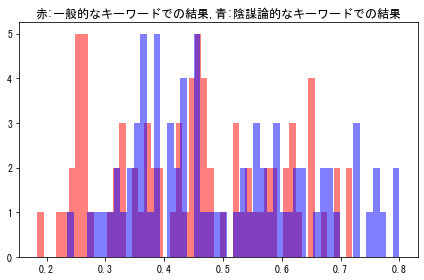

In [162]:
meishi_normal = normal_pd["名詞"].tolist()
meishi_unnormal = unnormal_pd["名詞"].tolist()

fig4 = plt.figure()
aax = fig4.add_subplot(111)

aax.hist(meishi_normal, bins=50, color='red',label="一般的なキーワードでの結果", alpha=0.5)
aax.hist(meishi_unnormal, bins=50, color='blue',label='陰謀論的なキーワードでの結果', alpha=0.5)
aax.set_title("赤:一般的なキーワードでの結果,青:陰謀論的なキーワードでの結果")
fig4.show()
fig4.tight_layout()

plt.savefig("images/fig4.png")

In [166]:
xa = pd.Series(meishi_normal[0:76])
xb = pd.Series(meishi_unnormal)

t, p = st.ttest_ind(xa, xb, equal_var=True)
MU = abs(xa.mean()-xb.mean())
SE =  MU/t
DF = len(xa)+len(xb)-2
CI = st.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )

print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')
print(f'平均値の差   = {MU:.2f}')
print(f'差の標準誤差 = {SE:.2f}')
print(f'平均値の差の95%信頼区間CI = [{CI[0]:.2f} , {CI[1]:.2f}]')

print(np.var(meishi_normal))
print(np.var(meishi_unnormal))

p値 = 0.026
t値 = -2.24
平均値の差   = 0.05
差の標準誤差 = -0.02
平均値の差の95%信頼区間CI = [nan , nan]
0.019895917605905235
0.02146658484245757
